# Week12 Ensemble Machine Learning


In week12, we've covered:
* **Ensemble Machine Learning**

Ensemble Learning is a process using which multiple machine learning models are strategically constructed to solve a particular problem. There are three main terms describing it:
* Bagging to decrease the model’s variance;
* Boosting to decrease the model’s bias;
* Stacking to increase the predictive force of the classifier.

As you can see, each has its own advantages/weaknesses. Which one to use and then depends on the problem at hand. Applying ensemble methods could reduce the error **(Bias + Variance + Irreducible error)** emerging from a machine model, but remember, a more complexed model may result in overfitting problem. 


The best way to consolidate the knowledge in your mind is by practicing.<br>Please complete the part marked with <span style="color:green">**# TODO**</span>.

[Google](www.google.com), [Python Documentation](https://docs.python.org/3/contents.html), and [scikit-learn Documentation](https://scikit-learn.org/stable/) are your good friends if you have any python questions.

Download **Week12_ensemble-machine-learning.ipynb** notebook to your local folder and open it with Jupyter Notebook.

### Data Loading and EDA

Libraries Installation
    

In [1]:
# TODO
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

%matplotlib inline

Data Loading

In [2]:
# TODO
data = pd.read_csv('heart_data.csv')

#### Columns of Dataset

* age: age in years
* sex: (1 = male; 0 = female)
* cp: chest pain type
* trestbps: resting blood pressure: (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target: 1 or 0

Data Exploration

In [3]:
# TODO
data.shape
data.head()
data.groupby("target").mean()
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [4]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Data Visualization -- use seaborn to plot graphs to help you better understand this dataset
- Hint: compare columns to the target (ex: age vs target) to determine what might be good predictors of it

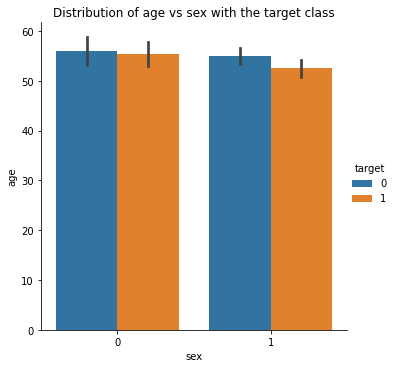

In [5]:
# TODO
sns.catplot(kind = 'bar', data = data, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()


Hopefully you have already built up some understandings of this dataset, now let's use this dataset to classify whether a person is suffering from a heart disease or not.

### Data Preprocessing

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
X = data.drop('target', axis = 1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Modeling

#### Logistic Regression

Let's build a classic logistic regression model as a baseline to see how it performs
- Use the metrics you've learned so far and compare the other models' performances with this

In [8]:
# TODO
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [9]:
y_pred = lr.predict(X_test)

In [10]:
roc_auc_score(y_test,y_pred)

0.6337535014005603

In [11]:
print('training error: %f' % (1-np.mean(lr.predict(X_train)==y_train)))
print('testing error: %f' % (1-np.mean(y_pred==y_test)))
print("lr score: ", lr.score(X_test,y_test))

training error: 0.286344
testing error: 0.355263
lr score:  0.6447368421052632


Which ensemble model would you suggest to try out and why?

In [12]:
# TODO
# Ensemble model combines multiple individual models together and delivers superior prediction power. 
# Bagging helps to reduce the variance error, 
# boosting helps to reduce bias error, 
# stacking helps to reduce the generalization error.

#### Random Forest

Train a Random Forest model and perform predictions on test set

In [13]:
# TODO 
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_score=rf.score(X_test, y_test)

How would you evaluate the model performance?

In [14]:
# TODO
print(confusion_matrix(y_test, y_pred))
rf.score(X_test,y_test)

[[22 12]
 [12 30]]


0.6842105263157895

Can you improve the model?

In [15]:
# Todo
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

rf=RandomForestClassifier(random_state=42)
param_grid={"n_estimators":[100,200,500],
            "max_depth":[2,4,None],
           "min_samples_split":[2,3,8],
           "min_samples_leaf":[3,4,6],
           "bootstrap":[True,False],
           "criterion":['gini','entropy']}

grid_search=GridSearchCV(rf,param_grid,n_jobs=-1,cv=3,scoring='accuracy')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, None],
                         'min_samples_leaf': [3, 4, 6],
                         'min_samples_split': [2, 3, 8],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [16]:
grid_search.best_score_
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

Please explain how you improved random forest model performance.

In [17]:
# Todo
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
best_rf_score=best_rf.score(X_test, y_test)
print(confusion_matrix(y_test, y_pred))

print("random rf score: ", rf_score)
print("tuned rf score: ", best_rf_score)

[[22 12]
 [ 7 35]]
random rf score:  0.6842105263157895
tuned rf score:  0.75


What are the five most important variables and how do you know?

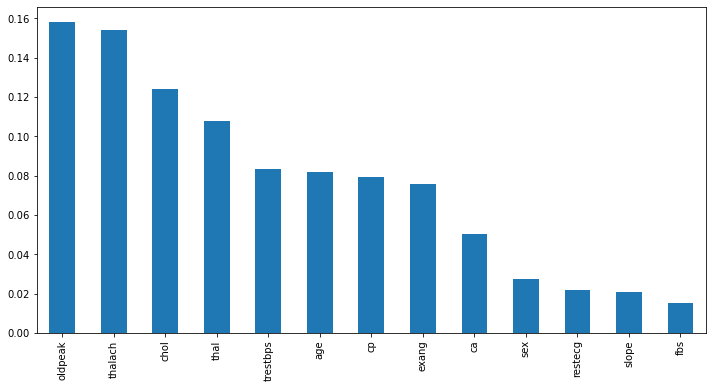

In [18]:
# Todo
pd.Series(best_rf.feature_importances_,
         index=X.columns).sort_values(ascending=False).plot(kind='bar',figsize=(12,6));

#### Boosting

Fit a boosting model (of your choice)

In [19]:
# Todo
xgb = XGBClassifier(learning_rate = 0.01, 
                    n_estimators=500, 
                    max_depth=5,
                    min_child_weight=8,
                    gamma=0,
                    subsample=0.8, 
                    colsample_bytree=0.8,
                    reg_alpha=0.01,
                    objective= 'binary:logistic',
                    nthread=4,
                    seed=27)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("xgboost score: ", xgb.score(X_test,y_test))

[[23 11]
 [10 32]]
xgboost score:  0.7236842105263158


### Model Comparison

We are interested in how to classify/predict heart disease. What metrics should be considered to evaluate model performance, in addition to accuracy?

In [20]:
# TODO
# Looking at fp, fn in addition to accuracy
# Since the model is predicting heart disease, too many type II errors is not advisable. 
# A False Negative ( ignoring the probability of disease when there actualy is one) is more dangerous 
# than a False Positive in this case. 


Compare and contrast the above 3 models (logistic regression, random forest, boosting) that you just built.

In [21]:
# TODO
models = []
models.append(("Logistic Regression:",lr))
models.append(("Random Forest:",best_rf))
models.append(("Xgboost:",xgb))

for name,model in models:
    tn,fp,fn,tp=confusion_matrix(y_test,model.predict(X_test)).ravel()
    print(name)
    print("accuracy ", model.score(X_test,y_test))
    print("true negative: ", tn)
    print("false positive: ", fp)
    print("false negative: ", fn)
    print("true positive: ", tp)
    print("fpr: ", fp/(tn+fp))
    print("fnr: ", fn/(tp+fn))

Logistic Regression:
accuracy  0.6447368421052632
true negative:  18
false positive:  16
false negative:  11
true positive:  31
fpr:  0.47058823529411764
fnr:  0.2619047619047619
Random Forest:
accuracy  0.75
true negative:  22
false positive:  12
false negative:  7
true positive:  35
fpr:  0.35294117647058826
fnr:  0.16666666666666666
Xgboost:
accuracy  0.7236842105263158
true negative:  23
false positive:  11
false negative:  10
true positive:  32
fpr:  0.3235294117647059
fnr:  0.23809523809523808


## Submission

Commit your completed **Week12_ensemble-machine-learning.ipynb** notebook to your personal Github repo you shared with the faculty.